In [1]:
project_name = "netflix data analysis"

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [101]:
netflix_df=pd.read_csv('/Users/rashm/OneDrive/Desktop/pythonmini/netflix_titles.csv')

In [102]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [103]:
type(netflix_df)

pandas.core.frame.DataFrame

In [104]:
netflix_df.shape

(8807, 12)

In [105]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [106]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [107]:
netflix_df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [108]:

x = netflix_df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [109]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [110]:
netflix_df['director']=netflix_df['director'].fillna('Director not specified')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [111]:
director_counts = netflix_df['director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Total Count']
director_counts = director_counts[director_counts['Director'] != 'Director not specified']
director_counts = director_counts.sort_values(by='Total Count', ascending=False)
top5_directors = director_counts.head()
print(top5_directors)

                 Director  Total Count
1           Rajiv Chilaka           19
2  Raúl Campos, Jan Suter           18
3             Suhas Kadav           16
4            Marcus Raboy           16
5               Jay Karas           14


# top 5  directors

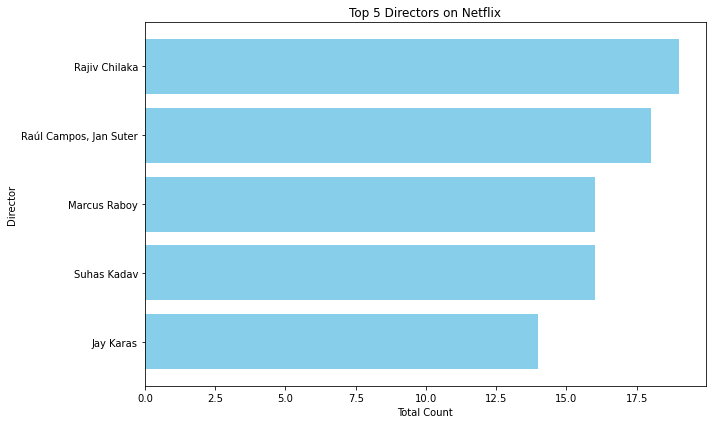

In [112]:


# Assuming top5_directors is a DataFrame containing director data
top5_directors = top5_directors.sort_values(by='Total Count')

# Create a horizontal bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top5_directors['Director'], top5_directors['Total Count'], color='skyblue')
plt.xlabel('Total Count')
plt.ylabel('Director')
plt.title('Top 5 Directors on Netflix')
plt.tight_layout()

# Save the figure using Matplotlib's savefig method
plt.savefig('TOP5_directors.png')

# Display the plot
plt.show()


In [113]:
# Trend of Content Produced on Netfilx Every Year
df1 = netflix_df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [114]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]



# Distribution of content ratings on Netflix

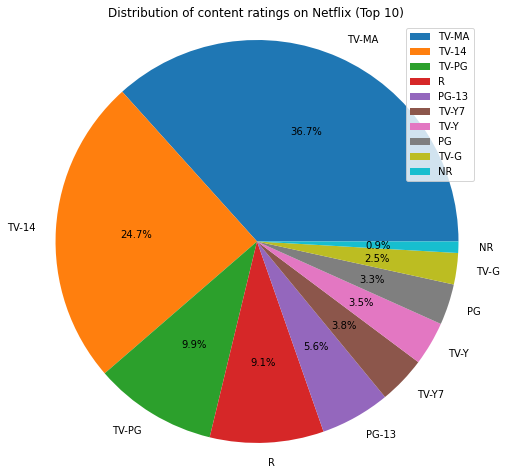

In [115]:
import matplotlib.pyplot as plt

# Sort the data by counts in descending order and select the top 10 parts
top10_ratings = x.sort_values(by='counts', ascending=False).head(10)

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(top10_ratings['counts'], labels=top10_ratings['rating'], autopct='%1.1f%%')
plt.title('Distribution of content ratings on Netflix (Top 10)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(loc='upper right', labels=top10_ratings['rating'])

# Save the figure using Matplotlib's savefig method
plt.savefig('distribution.png')

# Display the plot (if needed, comment out if only saving without displaying)
plt.show()



#  Relation between Type and Rating of Movies and Shows

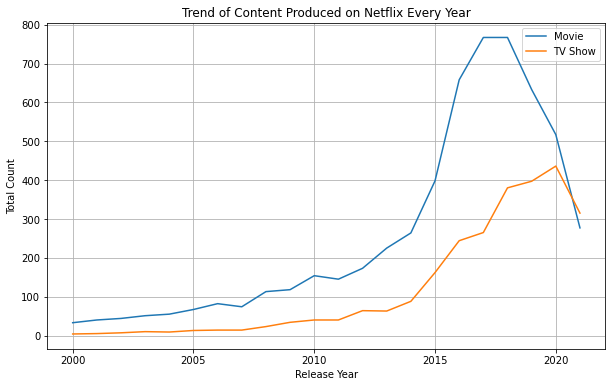

In [116]:
import matplotlib.pyplot as plt

# Assuming df2 is a DataFrame containing your data
df2 = df2[df2['Release Year'] >= 2000]

# Group the data by 'Release Year' and 'Type' and sum up the 'Total Count'
grouped_data = df2.groupby(['Release Year', 'Type'])['Total Count'].sum().unstack()

# Create the line plot using Matplotlib
plt.figure(figsize=(10, 6))
#plt.rcParams['axes.facecolor'] = 'white'  # Set background color
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.title("Trend of Content Produced on Netflix Every Year")
plt.xlabel("Release Year")
plt.ylabel("Total Count")
plt.legend()
plt.grid(True)

# Save the figure as an image file using Matplotlib's savefig method
plt.savefig('con_produced.png')

# Display the plot (if needed, comment out if only saving without displaying)
plt.show()


# Trend of Content Produced on Netfilx Every Year

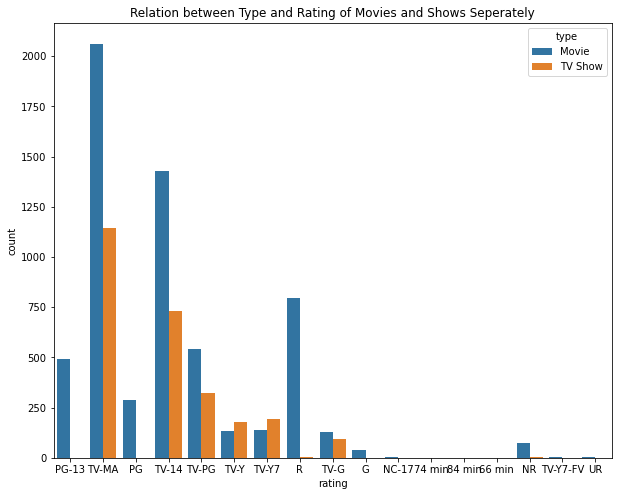

In [117]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_df)
plt.title('Relation between Type and Rating of Movies and Shows Seperately')
plt.savefig('type_and_rating.png')
plt.show()


# Number of content per Different type

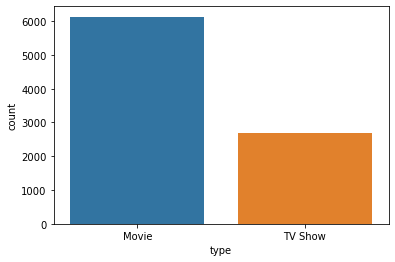

In [118]:

#sns.countplot('type', data=netflix_df_copy);
sns.countplot(x='type', data=netflix_df)
plt.savefig('type.png')

# Most titles produced country

In [119]:
most_titles_produced = netflix_df.groupby('country').count().sort_values('title',ascending=False).head(5)

most_titles_produced.reset_index(inplace=True)
most_titles_produced

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,2818,2818,2818,2818,2488,2812,2818,2818,2815,2818,2818
1,India,972,972,972,972,940,972,972,972,972,972,972
2,United Kingdom,419,419,419,419,351,418,419,419,419,419,419
3,Japan,245,245,245,245,240,244,245,244,245,245,245
4,South Korea,199,199,199,199,196,199,199,199,199,199,199


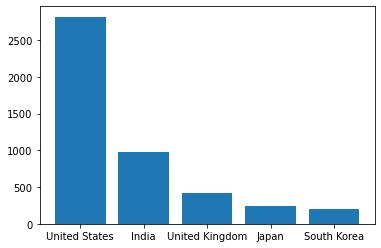

In [120]:
plt.bar(most_titles_produced.country,most_titles_produced.title);
plt.savefig('most_title.png')


#  Top 5 Most Popular Ratings on Netflix

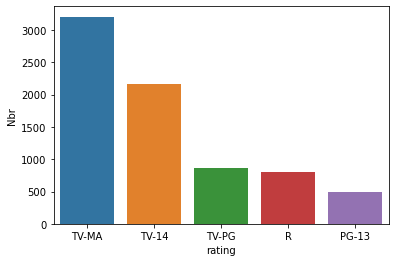

In [126]:
netflix_df_copy_rating = netflix_df['rating'].value_counts()
netflix_df_copy_rating = pd.DataFrame(netflix_df_copy_rating).reset_index()
netflix_df_copy_rating.columns = ['rating','Nbr']
sns.barplot(x = 'rating',y = 'Nbr', data=netflix_df_copy_rating.head(5));
plt.savefig('top5_rating.png')

In [ ]:
# Top 5 Most Popular Gendres on Netflix

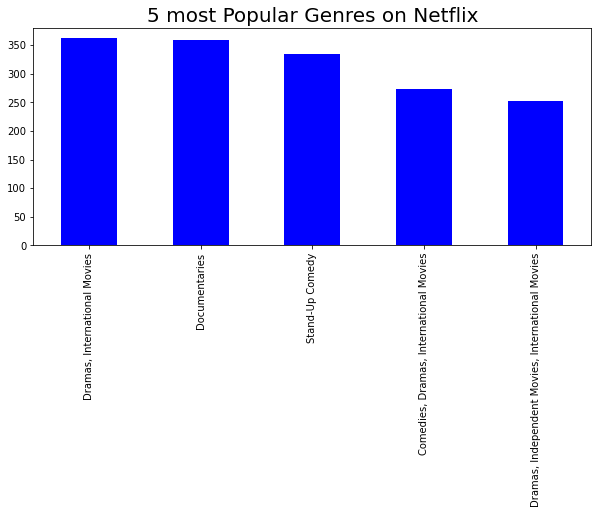

In [122]:
genre=netflix_df["listed_in"].value_counts().head(5)
genre
plt.figure(figsize=(10,4))
genre.plot(kind="bar",color="blue")
plt.title("5 most Popular Genres on Netflix",size=20);
plt.savefig('gendre.png')

In [ ]:
# Top 5 Years in Number of Titles Released

In [123]:
top_5_year = netflix_df.groupby('release_year').count().sort_values('title',ascending=False).head(5)

top_5_year.reset_index(inplace=True)
top_5_year

,release_year,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,2018,1147,1147,1147,1147,1026,1038,1146,1147,1147,1147,1147
1,2017,1032,1032,1032,1032,912,966,1032,1031,1031,1032,1032
2,2019,1030,1030,1030,1030,917,913,1030,1030,1030,1030,1030
3,2020,953,953,953,953,827,852,953,953,953,953,953
4,2016,902,902,902,902,804,838,901,902,902,902,902


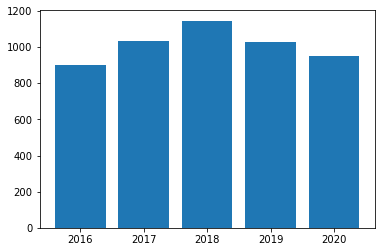

In [124]:
plt.bar(top_5_year.release_year,top_5_year.title);
plt.savefig('top_5_year.png')

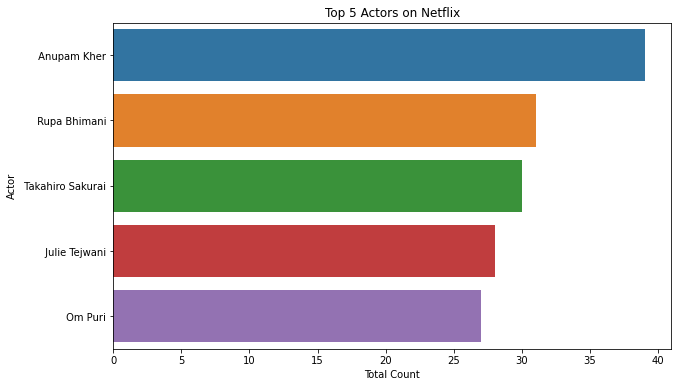

In [125]:
# Assuming you've already filled missing values with 'No cast specified'
# netflix_df['cast'] = netflix_df['cast'].fillna('No cast specified')

# Group by actor and count the number of occurrences
actor_counts = netflix_df['cast'].str.split(',', expand=True).stack().value_counts().reset_index()

# Rename the columns for clarity
actor_counts.columns = ['Actor', 'Total Count']

# Remove entries with 'No cast specified'
actor_counts = actor_counts[actor_counts['Actor'] != 'No cast specified']

# Sort by Total Count in descending order
actor_counts = actor_counts.sort_values(by='Total Count', ascending=False)

# Take the top 5 actors
top5_actors = actor_counts.head()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Count', y='Actor', data=top5_actors)
plt.title('Top 5 Actors on Netflix')
plt.xlabel('Total Count')
plt.ylabel('Actor')
plt.savefig('actor.png')
plt.show()
